<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Malayalam/Bert%2BbiLSTM_Malayalam_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers==3.3.1

     |████████████████████████████████| 1.1 MB 7.4 MB/s 
     |████████████████████████████████| 3.0 MB 29.4 MB/s 
     |████████████████████████████████| 895 kB 32.4 MB/s 
     |████████████████████████████████| 1.2 MB 31.9 MB/s 


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/mal_final.csv')
train1['labels']=LabelEncoder().fit_transform(train1['category'])
#train=train.drop(columns='label')
train1

,Unnamed: 0,Unnamed: 0.1,text,category,trans,translation,labels
0,0,0,Sunny chechi fans evide like adichu power kani...,unknown_state,{'ml': 'സുന്നി ചെച്ചി ഫാൻസ് എവിടെ ലൈക് അടിച്ച്...,"Sunny Cheung francs, 1992.",4
1,1,1,Angane july month ile ende aadyathe leave njan...,Positive,{'ml': 'അങ്ങനെ ജൂലൈ മോന്ത് എലി എന്ടെ ആദ്യത്തെ ...,"So, July, July 5th, July 5th, I'm on my first ...",2
2,2,2,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...,unknown_state,{'ml': 'ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിര...,Those waiting for my brother's new show---,4
3,3,3,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........,Positive,{'ml': 'ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്ന...,"Now, I'm going to begin the hunt of Laeddis......",2
4,4,4,Trailer powli oru raksha illa . Pakshea padam ...,Positive,{'ml': 'ട്രൈലർ പോളി ഒരു രക്ഷ ഇല്ല . പക്ഷീ പദം ...,The trilom system has no escape.,2
...,...,...,...,...,...,...,...
15883,15883,15883,Minimum 10 thavana kandavar maathram like adi,unknown_state,{'ml': 'മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി'},Only those who have seen 10 times have a license.,4
15884,15884,15884,Please cinema kaannaaan kothi aakunnu onnu rel...,Positive,{'ml': 'പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന...,"Please, let's just sign the film. Please.",2
15885,15885,15885,USA ok.. India No... Sadhacharam,unknown_state,{'ml': 'ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം'},Good-bye!,4
15886,15886,15886,nama hero december 12 wait & see mamamaga mah...,Positive,{'ml': 'നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ ...,The date of December 12 of the 12th Cygm 3 Cyg...,2


In [3]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]
  if train1['category'][i]=='not-malayalam':
    train1['trans'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
train2=pd.DataFrame(columns=['labels','tweets'])
train2['labels']=train1['labels'].append(train1['labels'])
train2['tweets']=train1['text'].append(train1['trans'])
train2

,labels,tweets
0,4,Sunny chechi fans evide like adichu power kani...
1,2,Angane july month ile ende aadyathe leave njan...
2,4,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3,2,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4,2,Trailer powli oru raksha illa . Pakshea padam ...
...,...,...
15883,4,മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി
15884,2,പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന്ന് റിലീ...
15885,4,ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം
15886,2,നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ മഹാ മാഗ്...


In [5]:
train2=pd.DataFrame(columns=['labels','tweets'])
train2['labels']=train1['labels'].append(train1['labels'])
train2['tweets']=train1['text'].append(train1['trans'])
train2

,labels,tweets
0,4,Sunny chechi fans evide like adichu power kani...
1,2,Angane july month ile ende aadyathe leave njan...
2,4,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3,2,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4,2,Trailer powli oru raksha illa . Pakshea padam ...
...,...,...
15883,4,മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി
15884,2,പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന്ന് റിലീ...
15885,4,ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം
15886,2,നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ മഹാ മാഗ്...


In [6]:
train=pd.DataFrame(columns=['labels','tweets'])
train['labels']=train2['labels'].append(train1['labels'])
train['tweets']=train2['tweets'].append(train1['translation'])
train

,labels,tweets
0,4,Sunny chechi fans evide like adichu power kani...
1,2,Angane july month ile ende aadyathe leave njan...
2,4,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3,2,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4,2,Trailer powli oru raksha illa . Pakshea padam ...
...,...,...
15883,4,Only those who have seen 10 times have a license.
15884,2,"Please, let's just sign the film. Please."
15885,4,Good-bye!
15886,2,The date of December 12 of the 12th Cygm 3 Cyg...


In [7]:
train=train.dropna()

In [8]:
val=pd.read_csv('/content/Mal_sentiment_full_test_withlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val['labels']=LabelEncoder().fit_transform(val['category'])
val['tweets']=val['text']
val=val.drop(columns=['category','text'])
val

,id,labels,tweets
0,Mal_1,2,Teaserinu kurach samayamkoodi mathram. Cant wa...
1,Mal_2,4,അപ്പോൾ കഥയുടെ റൂട്ട് മാറിയല്ലോ...
2,Mal_3,4,മൂത്തോൻ ട്രൈലെർ Trending List വരാത്തത് എന്താ ?
3,Mal_4,3,Nowadays 944k views is considered as 1M views ...
4,Mal_5,2,Maass.trailer ennu paranja ithaanU makkale.......
...,...,...,...
1957,Mal_1958,4,Expression വച്ചു നോക്കുമ്പോൾ മൂക്കുത്തി കട്ടത്...
1958,Mal_1959,4,എനിക്ക് ഒരു 100 like തരുമോ
1959,Mal_1960,1,Nannayi onnu poliyunna lakshnm unde...Thrill m...
1960,Mal_1961,0,Athikam eduthu kayatti vekkenda....direction k...


In [9]:

import pandas as pd
from torch.utils.data import Dataset,DataLoader

class RFDataset(Dataset):
  def __init__(self,text,label,tokenizer,max_len):
    self.text = text
    self.label = label
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.text)
  
  def __getitem__(self,item):
    text = str(self.text[item])
    label = self.label[item]

    encoding = self.tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length = self.max_len,
        return_token_type_ids = False,
        padding = 'max_length',
        return_attention_mask= True,
        return_tensors='pt',
        truncation=True
    )

    return {
        'text' : text,
        'input_ids' : encoding['input_ids'].flatten(),
        'attention_mask' : encoding['attention_mask'].flatten(),
        'label' : torch.tensor(label,dtype=torch.long)

    }

In [10]:
 
print('Training set size:',train.shape)
#Uncomment the next line when we have the test data
#print('Testing set size:',test.shape)
print('validation set size:',val.shape)

Training set size: (47658, 2)
validation set size: (1962, 3)


In [11]:
import numpy as np

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train.labels.values),
                                                  train.labels.values)
class_weights

array([3.43110151, 1.50935867, 0.49481389, 2.74606742, 0.60208452])

In [12]:

def create_data_loader(df,tokenizer,max_len,batch_size):
  ds = RFDataset(
      text = df.tweets.to_numpy(),
      label = df.labels.to_numpy(),
      tokenizer = tokenizer,
      max_len = max_len
  )

  return DataLoader(ds,
                    batch_size = batch_size,
                    shuffle = True,
                    num_workers=4)

In [13]:
from transformers import XLNetTokenizer,XLNetModel,AdamW,get_linear_schedule_with_warmup,AutoModel,AutoTokenizer
device = 'cuda'
PRE_TRAINED_MODEL_NAME = 'bert-base-multilingual-uncased'
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


In [14]:
BATCH_SIZE = 32
MAX_LEN = 128
train_data_loader = create_data_loader(train,tokenizer,MAX_LEN,BATCH_SIZE)
val_data_loader = create_data_loader(val,tokenizer,MAX_LEN,BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [15]:
BERT_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [16]:
import torch
import torch.nn as nn
class RFClassifier(nn.Module):
  def __init__(self, n_classes):
    super(RFClassifier, self).__init__()
    self.auto = AutoModel.from_pretrained('bert-base-multilingual-uncased')
    self.lstm = nn.LSTM(768, 256, batch_first=True,bidirectional=True)
    self.linear = nn.Linear(256*2, 128)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.4)
    self.out = nn.Linear(128, n_classes)
  
  def forward(self, input_ids, attention_mask):
    sequence_output, pooled_output = self.auto(input_ids, 
               attention_mask=attention_mask)

    # sequence_output has the following shape: (batch_size, sequence_length, 768)
    lstm_output, (h,c) = self.lstm(sequence_output) ## extract the 1st token's embeddings
    hidden = torch.cat((lstm_output[:,-1, :256],lstm_output[:,0, 256:]),dim=-1)
    linear_output = self.linear(lstm_output[:,-1].view(-1,256*2)) ### assuming that you are only using the output of the last LSTM cell to perform classification

    return linear_output

In [17]:
model = RFClassifier(5)
model = model.to(device)

In [18]:
EPOCHS = 5
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [19]:

def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for data in data_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['label'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs,labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [20]:

def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, labels)
      correct_predictions += torch.sum(preds == labels)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [21]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [22]:
from collections import defaultdict
import torch
 
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
 
 
  start_time = time.time()
  train_acc,train_loss = train_epoch(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(train)
  )
   
  
  val_acc,val_loss = eval_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(val)
  )
  
  end_time = time.time()
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)
  print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'Train Loss {train_loss} accuracy {train_acc}')
  print(f'Val Loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(),'bert-base-multilingual-uncased.bin')
    best_accuracy = val_acc

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 01 | Epoch Time: 20m 19s
Train Loss 1.155016916910274 accuracy 0.5313693398799783
Val Loss 0.9539981686299847 accuracy 0.63506625891947

Epoch: 02 | Epoch Time: 20m 24s
Train Loss 0.8763568555748703 accuracy 0.6690377271392002
Val Loss 0.8729193042362889 accuracy 0.6819571865443426

Epoch: 03 | Epoch Time: 20m 24s
Train Loss 0.7484277650613913 accuracy 0.72183054261614
Val Loss 0.8530198239511059 accuracy 0.6906218144750256

Epoch: 04 | Epoch Time: 20m 23s
Train Loss 0.6554637312689083 accuracy 0.7582777288178271
Val Loss 0.8821574930221804 accuracy 0.690112130479103

Epoch: 05 | Epoch Time: 20m 24s
Train Loss 0.583754217044619 accuracy 0.7877376306181544
Val Loss 0.9286868817383244 accuracy 0.6926605504587157



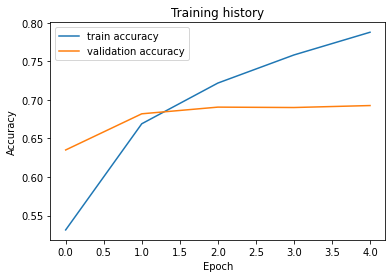

In [23]:
import matplotlib.pyplot as plt
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
#plt.ylim([0, 1]);

In [24]:
val_acc, _ = eval_model(
  model,
  val_data_loader,
  loss_fn,
  device,
  len(val) #Change it to test when you have the test results
)
val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.6926605504587157

In [25]:
def get_predictions(model, data_loader):
  model = model.eval()
  sentence = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      sentence.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(labels)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sentence, predictions, prediction_probs, real_values

In [26]:

y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  val_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred,zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.2842    0.2015    0.2358       134
           1     0.5798    0.5349    0.5565       258
           2     0.7422    0.7974    0.7689       780
           3     0.7630    0.7007    0.7305       147
           4     0.7149    0.7294    0.7221       643

    accuracy                         0.6927      1962
   macro avg     0.6168    0.5928    0.6027      1962
weighted avg     0.6822    0.6927    0.6863      1962

